# Binary Classification with a Bank Churn Dataset

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading test csv file and storing into df_test variable
df_test = pd.read_csv( "test.csv")
#Reading train csv file and storing into df_train variable
df_train = pd.read_csv( "train.csv")
df_test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [3]:
df_train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [4]:
# Information about the dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [5]:
# Information about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
#Finding all the null values in test
df_test.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [7]:
#Finding all the null values in test
df_train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#Descriptive Statistics
df_test.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,220045.000000,1.569210e+07,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,31761.048671,7.168499e+04,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,165034.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,192539.500000,1.563286e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,220045.000000,1.569018e+07,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,247550.500000,1.575693e+07,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,275056.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


In [9]:
#Descriptive Statistics
df_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


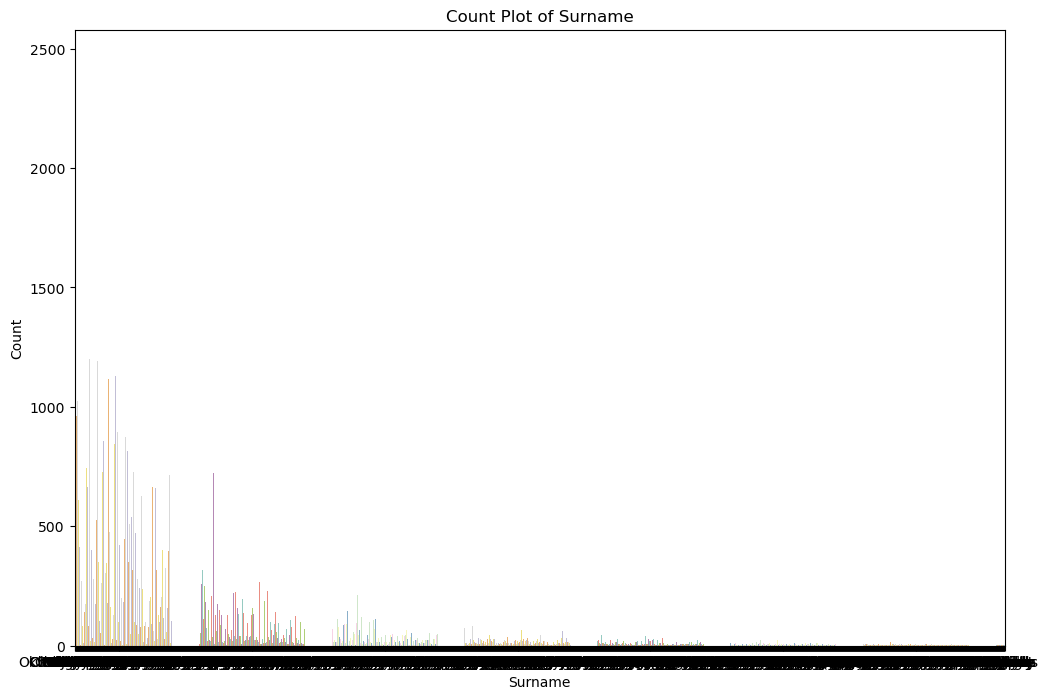

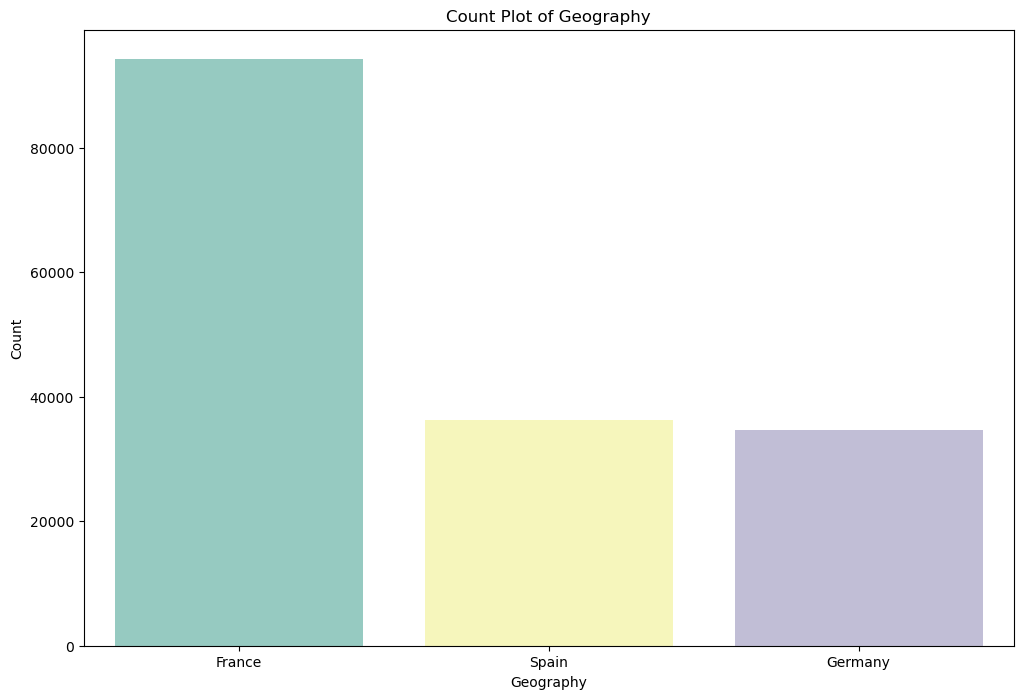

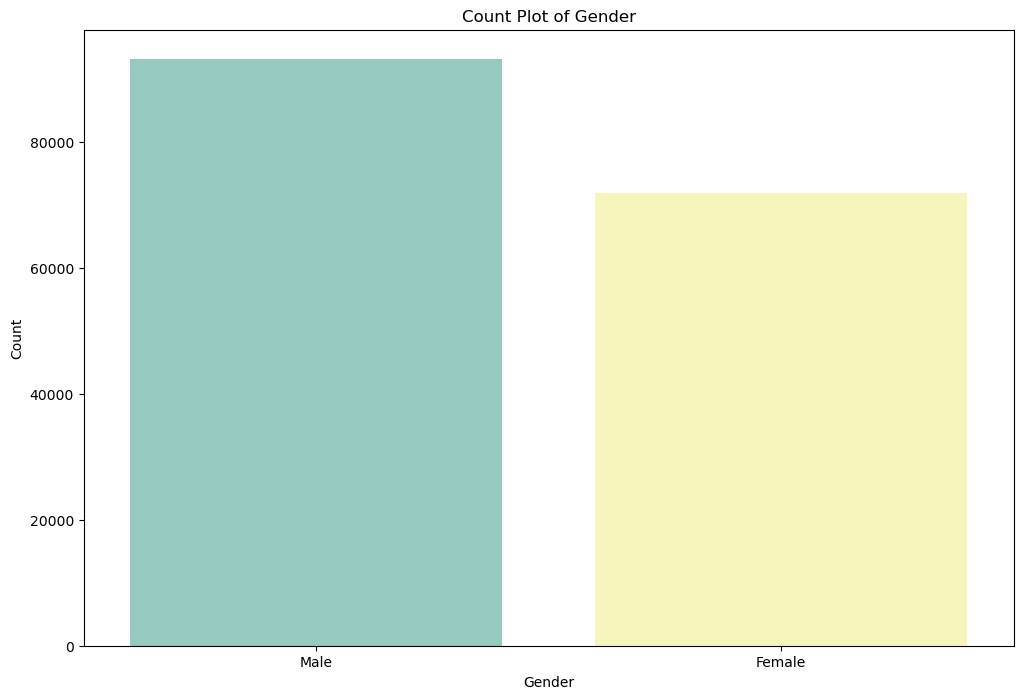

In [10]:
# Create count plots for categorical columns
for column in df_train.select_dtypes(include='object').columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=column, data=df_train, palette="Set3")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {column}')
    plt.show()

In [11]:
# Identify qualitative and quantitative features
# Initialize empty lists to store column names
qualitative_train = []
quantitative_train = []

# Loop through columns in X_train
for column in df_train.columns:
    if df_train[column].dtype == 'object':       # Check if the column's data type is 'object' 
        qualitative_train.append(column)              # If yes, add it to the qualitative list
    else:
        quantitative_train.append(column)             # If no, add it to the quantitative list

In [12]:
qualitative_train

['Surname', 'Geography', 'Gender']

In [13]:
quantitative_train

['id',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

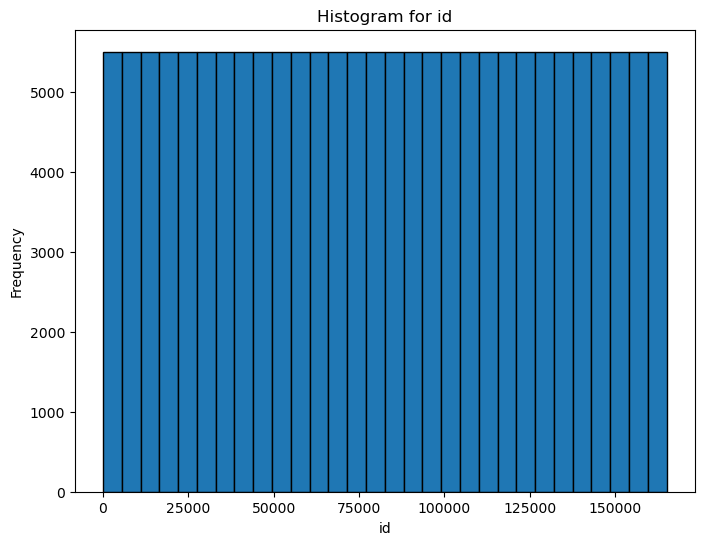

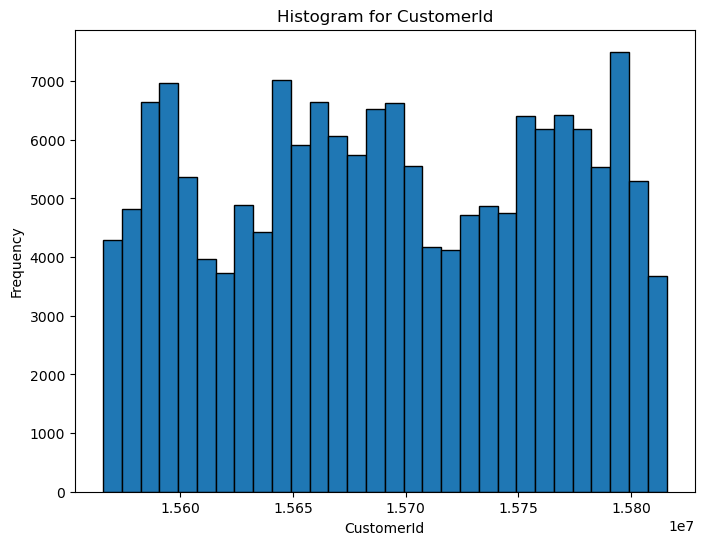

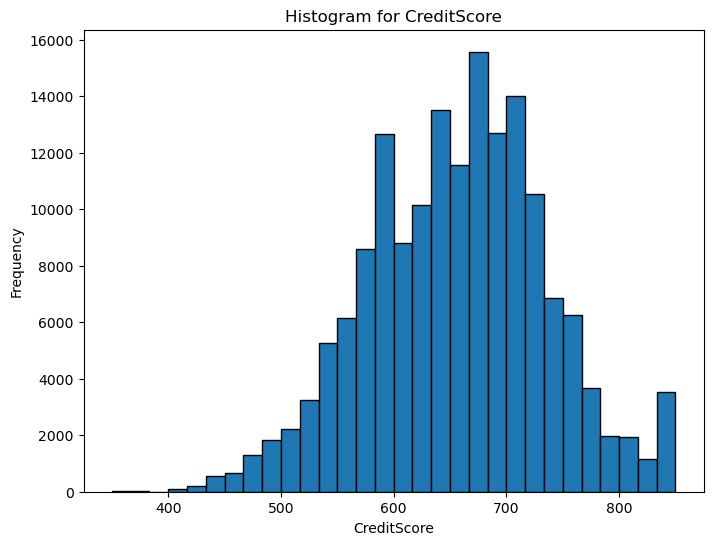

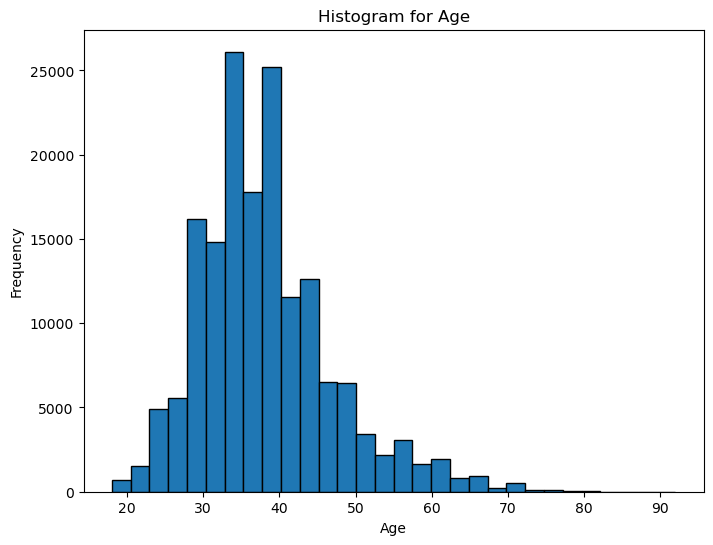

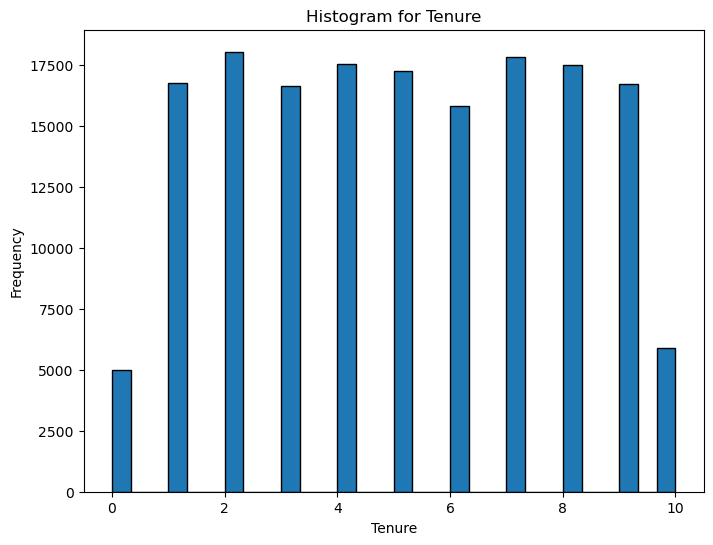

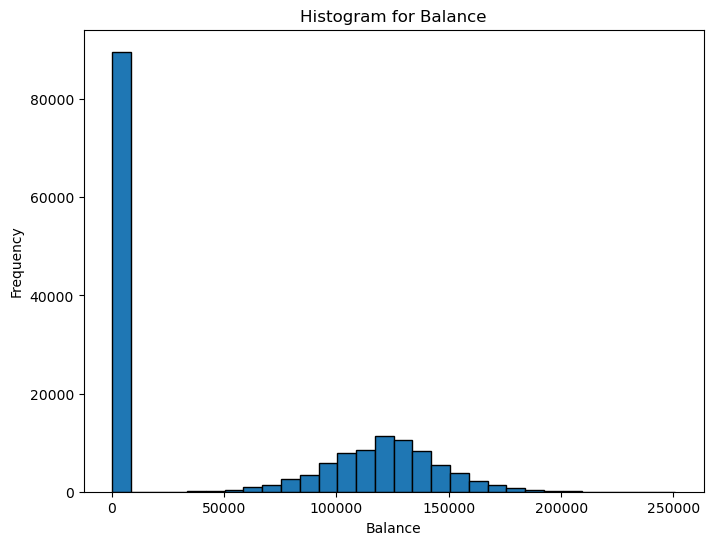

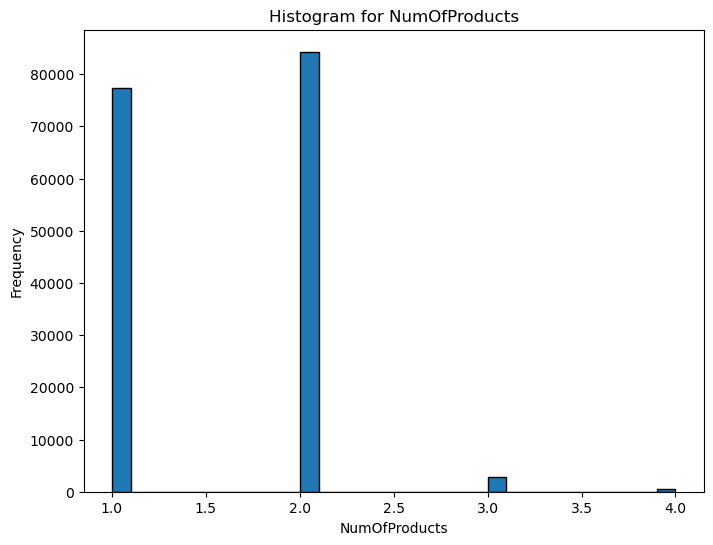

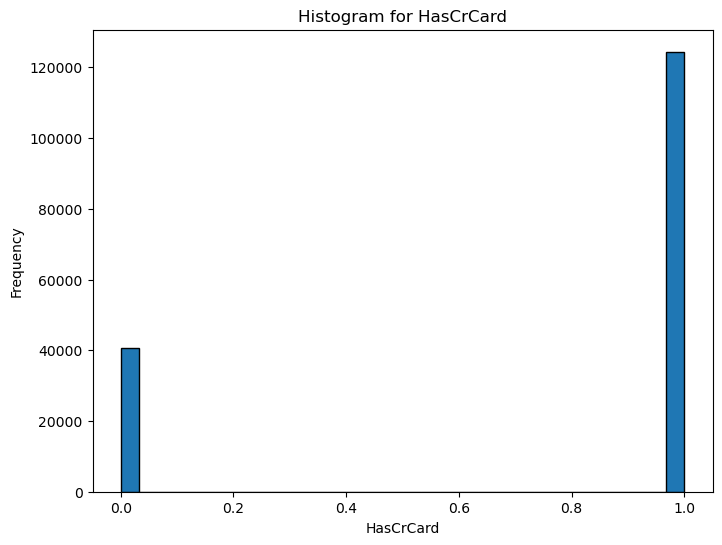

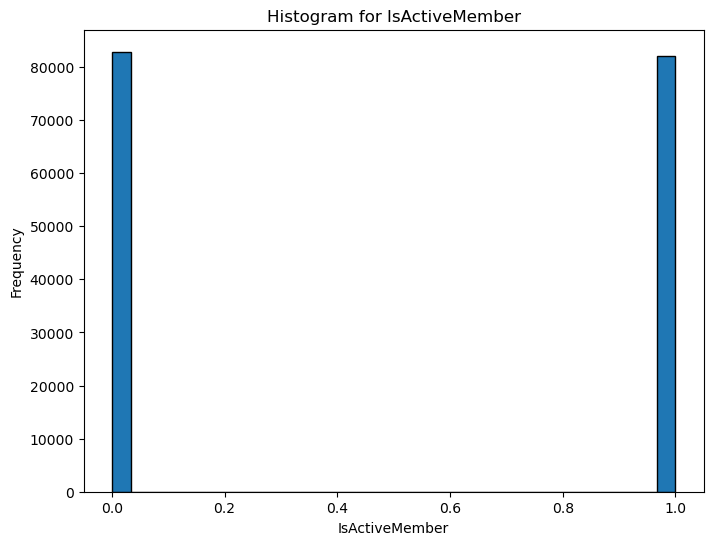

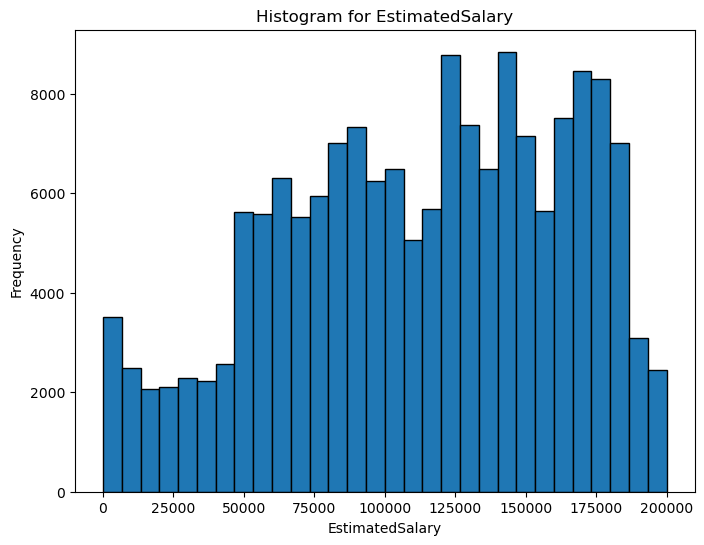

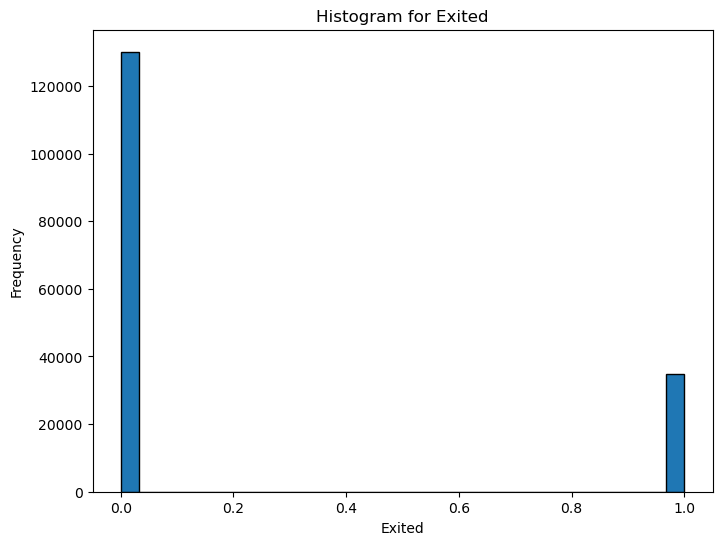

In [14]:
# Create Histogram for quantitative for train
for column in quantitative_train:
    plt.figure(figsize=(8, 6))  
    plt.hist(df_train[column], bins=30, edgecolor='black') 
    plt.title(f'Histogram for {column}')  
    plt.xlabel(column)  
    plt.ylabel('Frequency')
    plt.show()

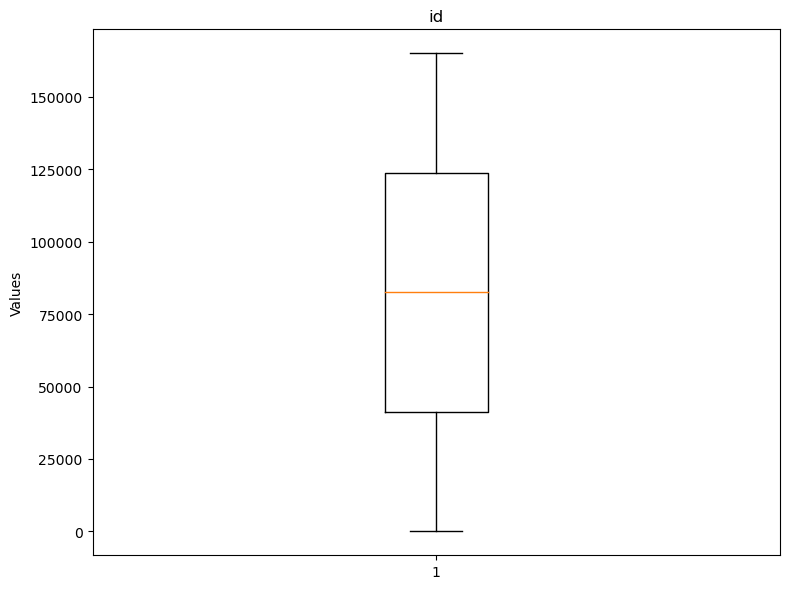

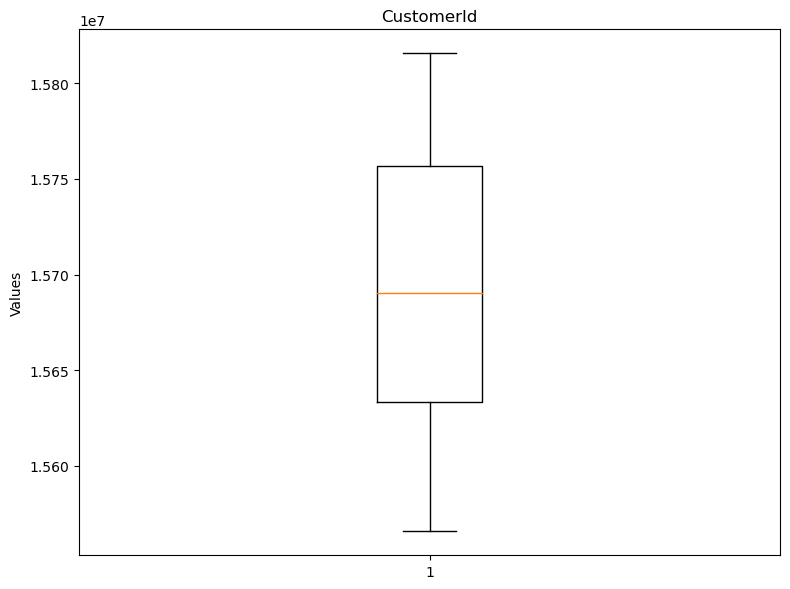

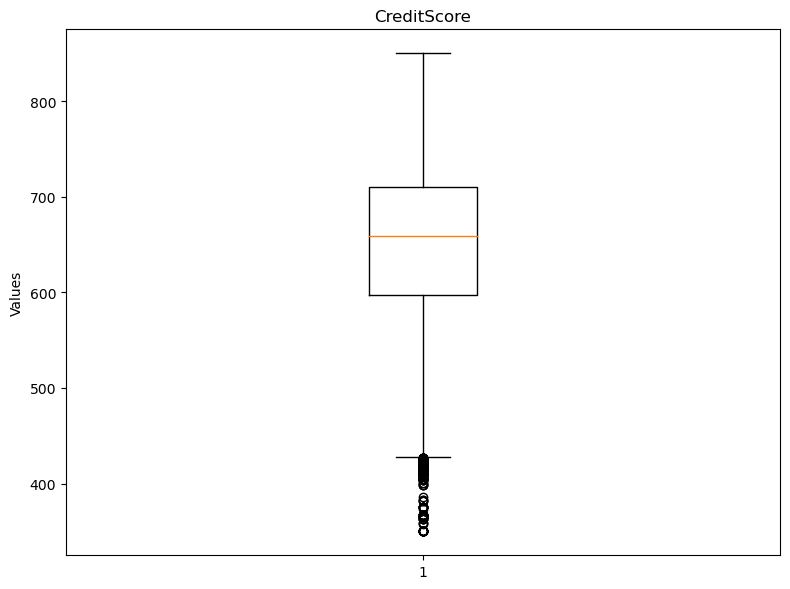

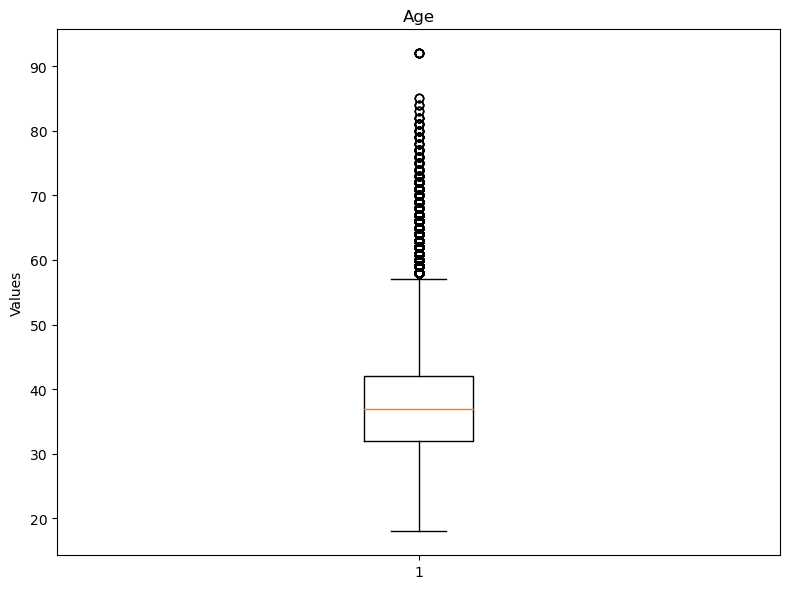

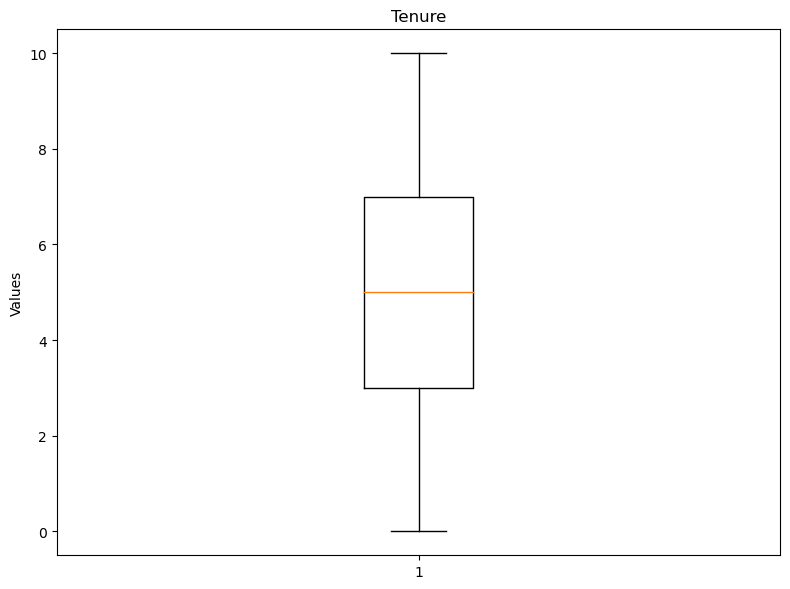

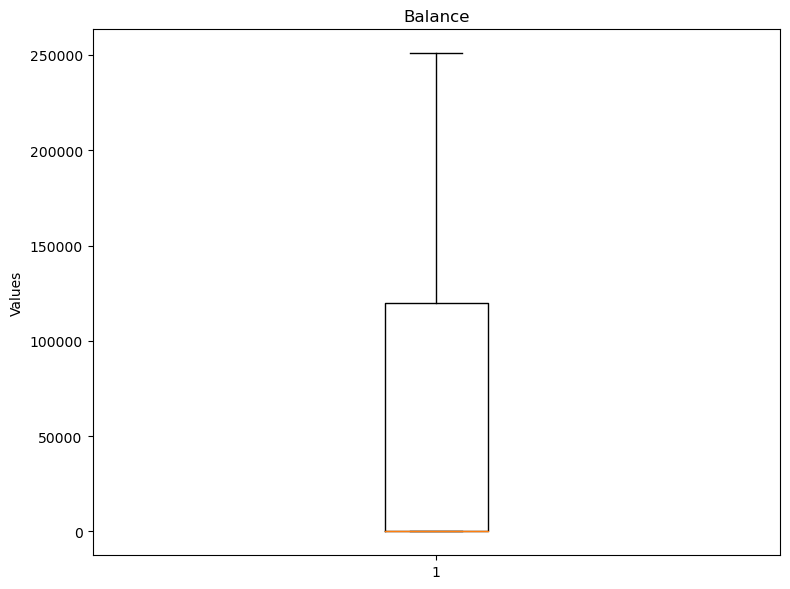

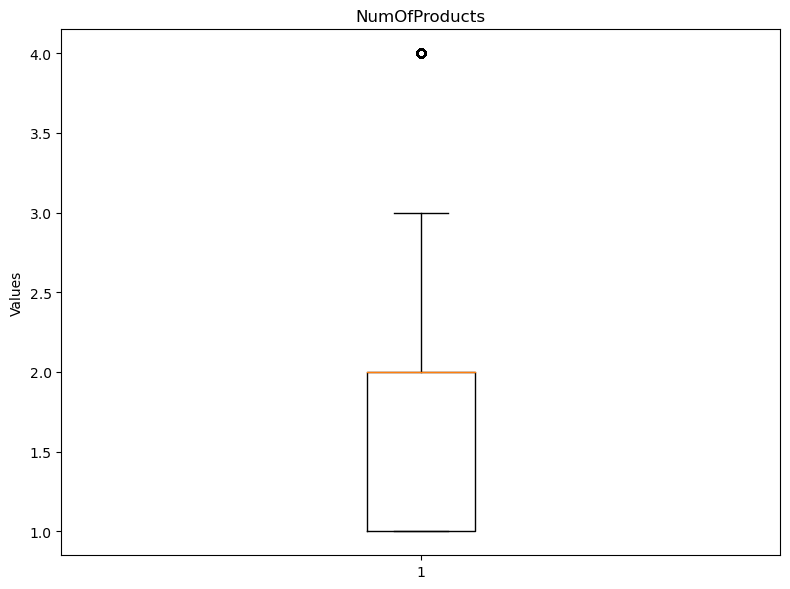

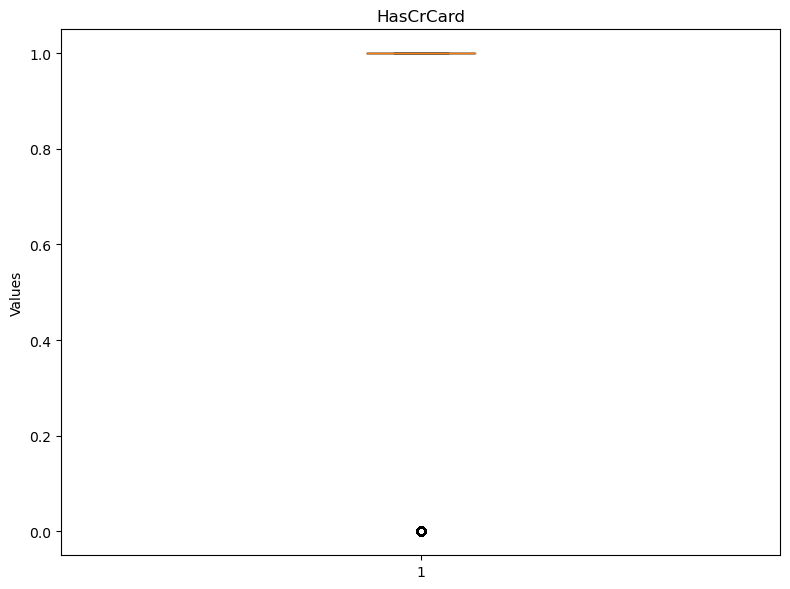

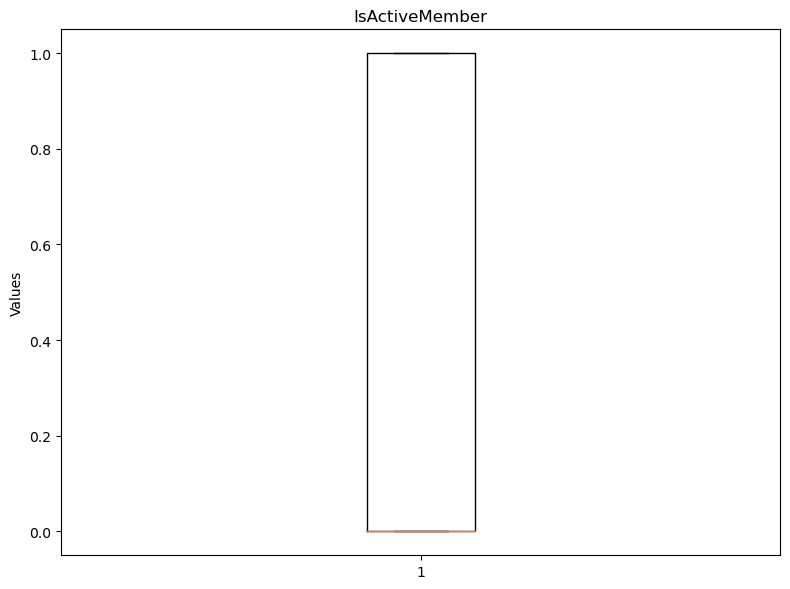

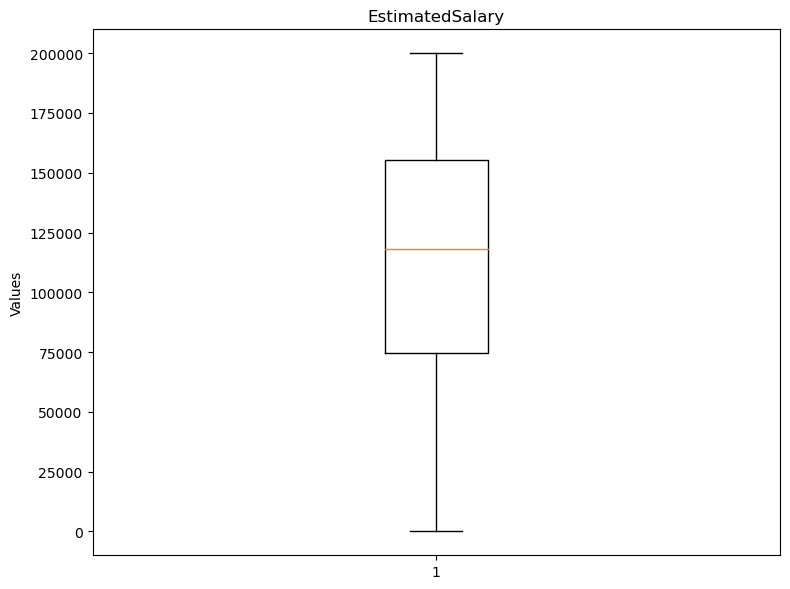

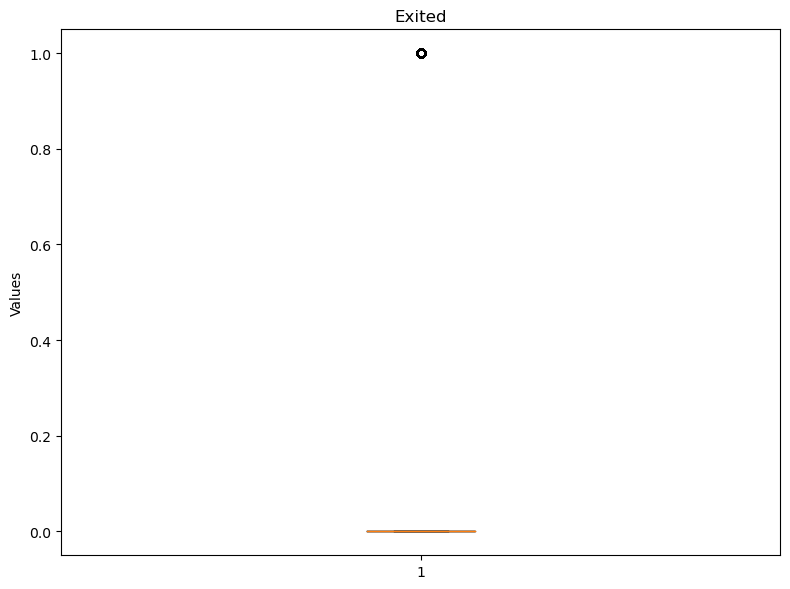

In [15]:
# Create boxplot for quantitative for train
for column in quantitative_train:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_train[column])
    plt.title(column)
    plt.ylabel('Values')
    plt.tight_layout()
    plt.show()

In [16]:
# Using Label Encoding to convert categorical variables to numeric format
# Initialize the LabelEncoder
label_encoder = preprocessing.LabelEncoder()
# Encode categorical variables in the test set 
df_test['Surname'] = label_encoder.fit_transform(df_test['Surname'])
df_test['Geography'] = label_encoder.fit_transform(df_test['Geography'])
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])
# Encode categorical variables in the train set 
df_train['Surname'] = label_encoder.fit_transform(df_train['Surname'])
df_train['Geography'] = label_encoder.fit_transform(df_train['Geography'])
df_train['Gender'] = label_encoder.fit_transform(df_train['Gender'])

In [17]:
df_test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,1482,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,1812,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,1246,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,1832,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,1079,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,1933,570,2,1,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,579,575,0,0,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,410,712,0,1,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,2656,709,0,0,32.0,3,0.00,1,1.0,1.0,158816.58


In [18]:
df_train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,1924,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,1925,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,1178,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,1299,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,467,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,1701,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,1918,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,1172,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,1176,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [21]:
# Removing outliers from the 'train' DataFrame using Z-scores
z_scores = np.abs(zscore(df_train[quantitative_train]))
threshold = 3
df_train = df_train[(z_scores < threshold).all(axis=1)]

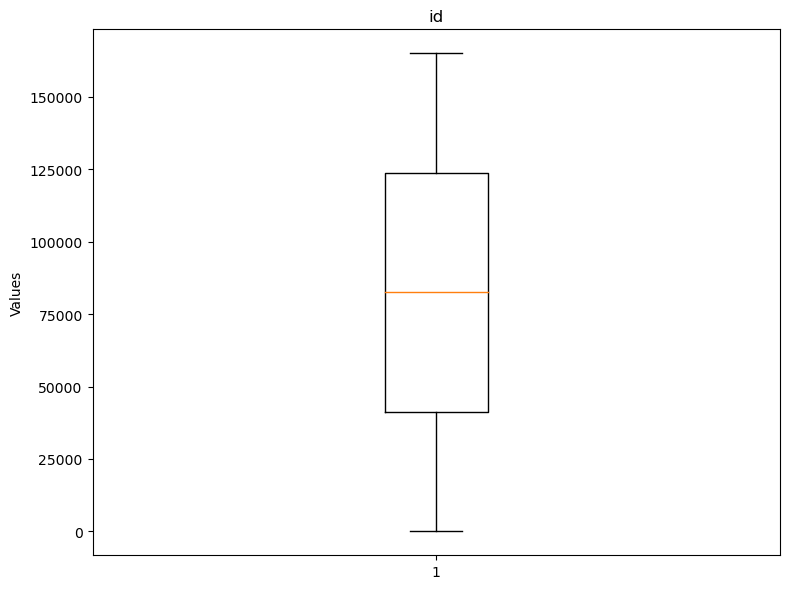

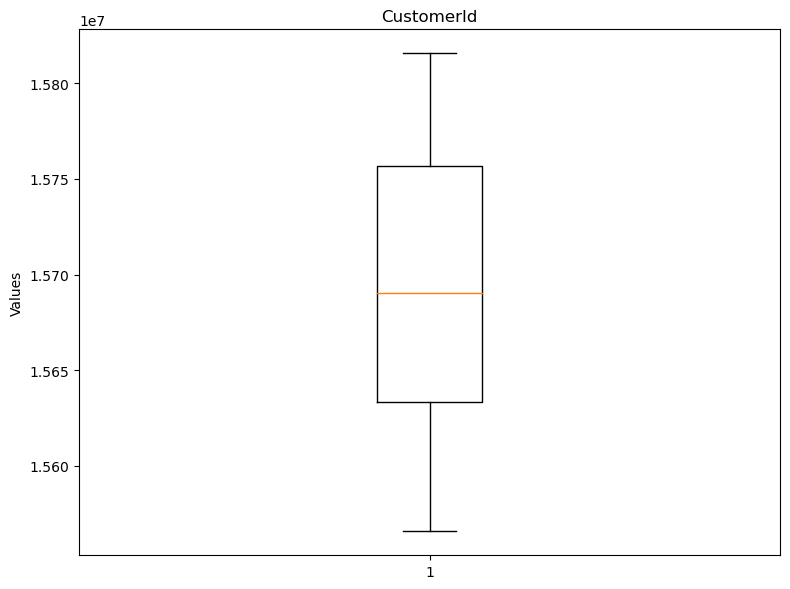

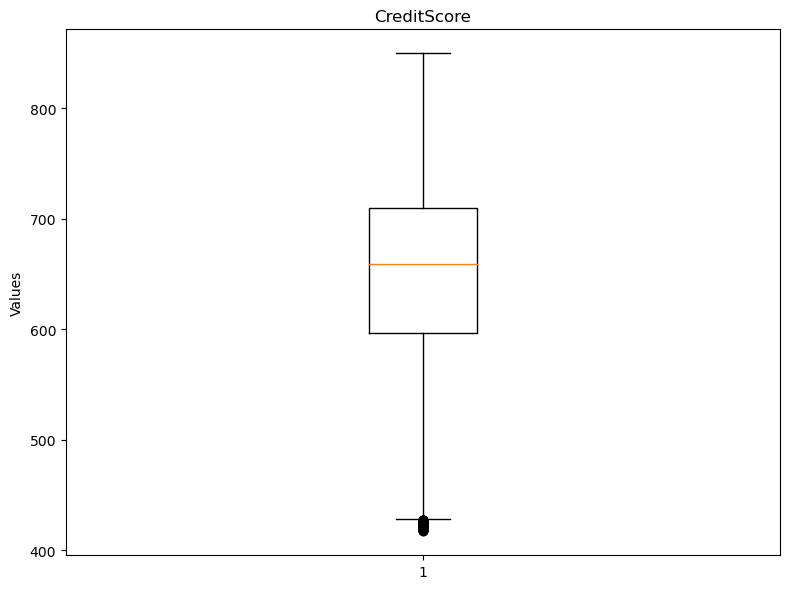

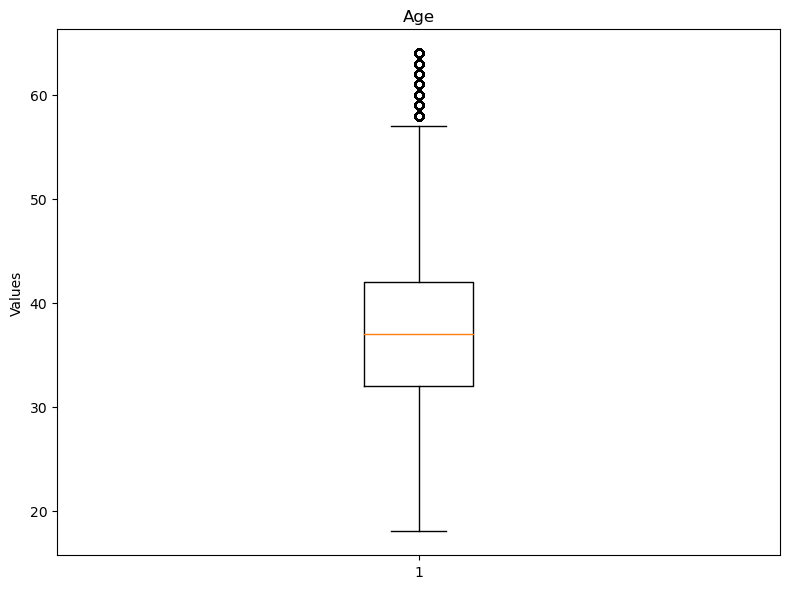

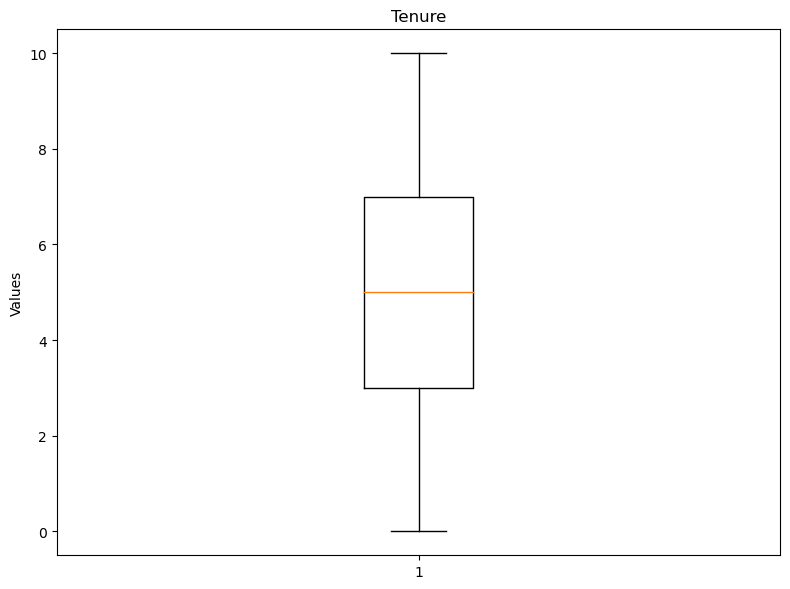

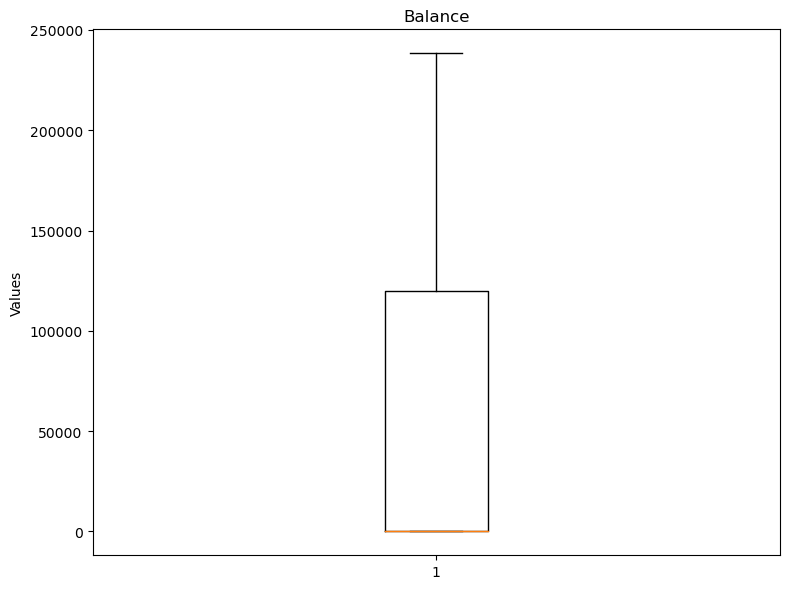

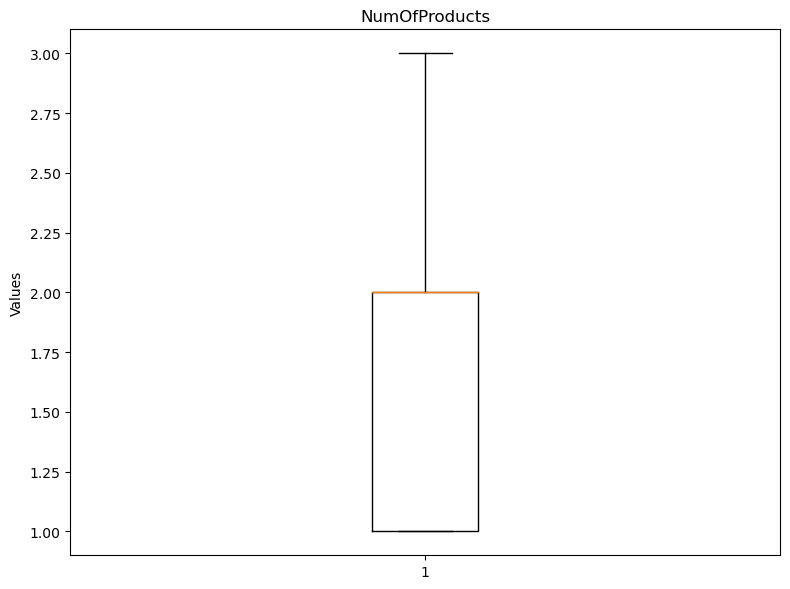

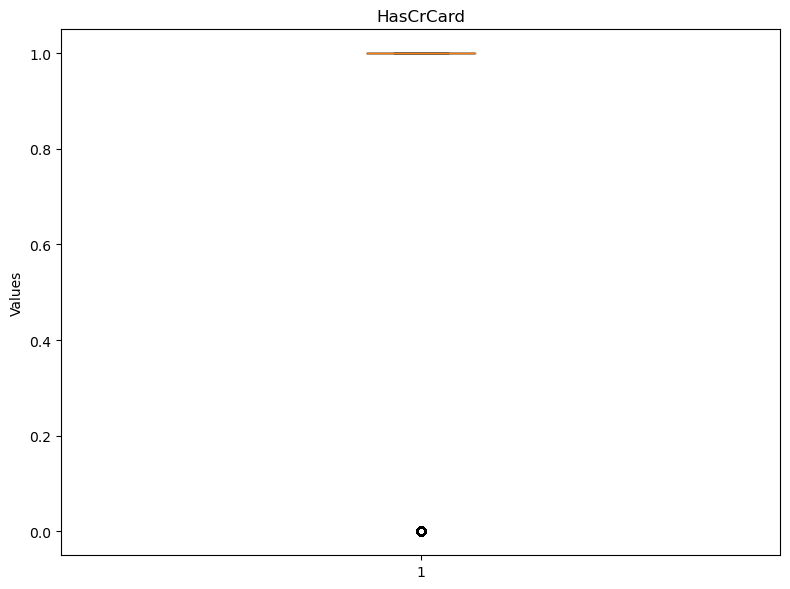

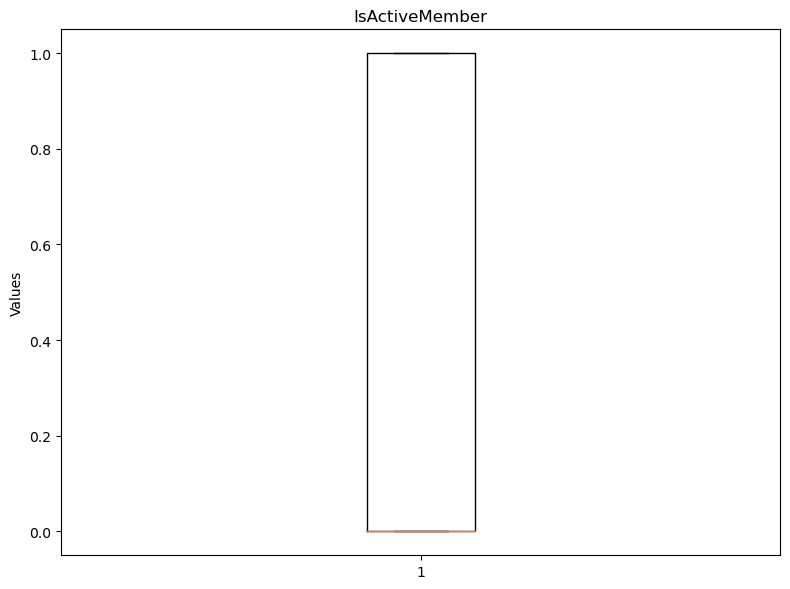

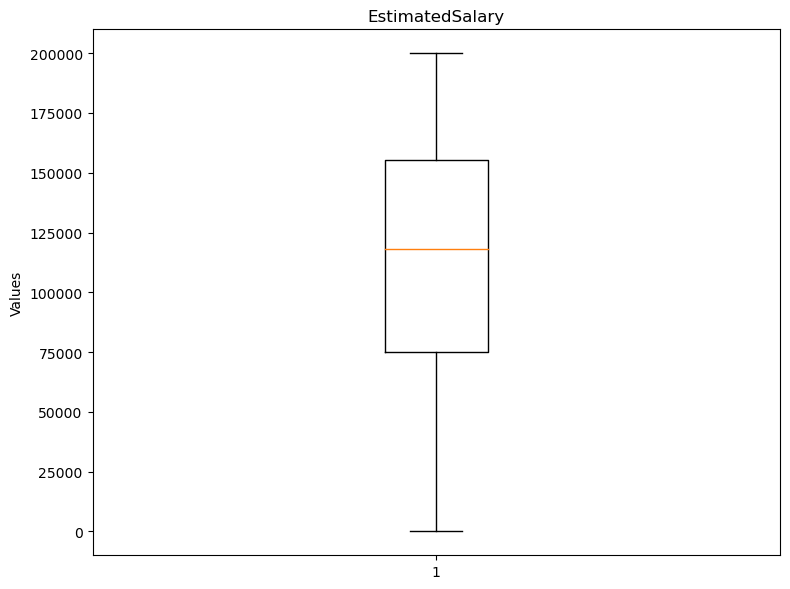

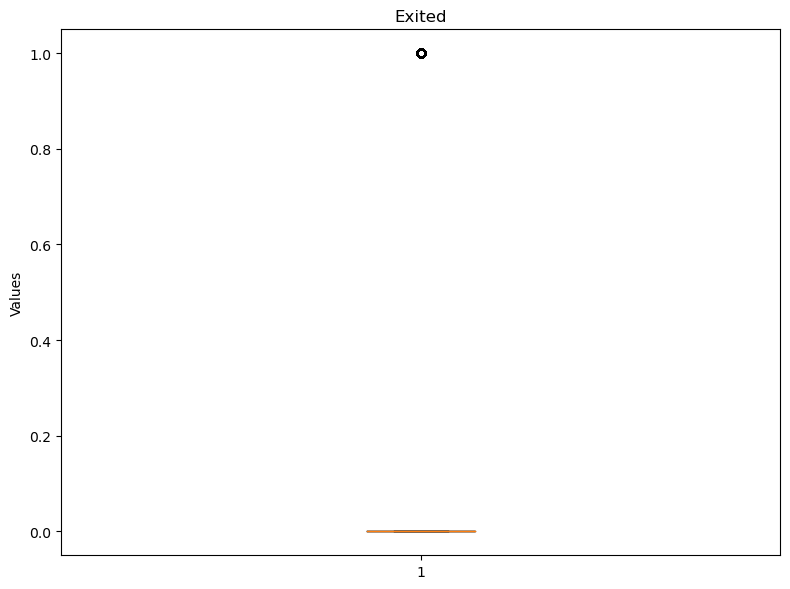

In [22]:
# Create box plots for quantitative variable
for column in quantitative_train:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_train[column])
    plt.title(column)
    plt.ylabel('Values')
    plt.tight_layout()
    plt.show()

In [26]:
# Separate features and target variable
X_train = df_train.drop(['Exited'], axis=1)
y_train = df_train['Exited']

In [27]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [28]:
# Fit the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
X_test = df_test
# Predict on the validation set
y_pred = model.predict(X_test)

In [30]:
X_test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,1482,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,1812,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,1246,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,1832,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,1079,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,1933,570,2,1,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,579,575,0,0,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,410,712,0,1,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,2656,709,0,0,32.0,3,0.00,1,1.0,1.0,158816.58


In [31]:
# Assuming 'id' is a unique identifier column in the test dataset
submission_df = pd.DataFrame({'id': df_test['id'], 'Exited': y_pred})

# Read the sample submission file
sample_submission = pd.read_csv('sample_submission.csv')

In [32]:
# Extract the actual labels from the sample submission (assuming 'Exited' column contains actual labels)
actual_labels = sample_submission['Exited']

In [35]:
# Convert actual labels to integers
actual_labels = actual_labels.astype(int)

In [36]:
# Evaluate the model
accuracy = accuracy_score(actual_labels, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


In [37]:
# Display classification report
print('Classification Report:')
print(classification_report(actual_labels, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92    110023
           1       0.00      0.00      0.00         0

    accuracy                           0.85    110023
   macro avg       0.50      0.43      0.46    110023
weighted avg       1.00      0.85      0.92    110023

